# **MNIST Classifier**
In this notebook we will create a classifier which can classify handwritten digits. 

In [1]:
%tensorflow_version 2.x

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Inspect the data


To understand the inputs and outputs of our network, first we must understand the data.

Let's take a look at the shape of the data:

In [2]:
print('Training data shape: {} '.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))

Training data shape: (60000, 28, 28) 
Test data shape (10000, 28, 28)


We can see that the training data contains 60000 samples and the test data contains 10000 samples. 

The number of samples is key to giving us an understanding of how thorough our test is. The greater the proportion of test data, the more sure we can be of our results. However, everytime we increase the proportion of test data we also lose data for training. This means we will lose some accuracy, and there is a balancing act at play.


Now we understand what the first dimension of the shape means. But what about the other two (28,28)? These are the pixel values representing the image for each sample. Let's take a look at a few examples.

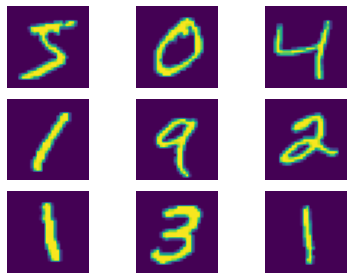

In [3]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(x_train[i])

# To align images without titles overlapping
plt.tight_layout()

## Normalization
Now we have an understanding of the meaning of each piece of data. However, one thing we don't understand is the bounds that our data can reach. Let's take a look.

In [4]:
print(x_train.dtype) # Gives us the data type of the dataset
print(np.max(x_train[0])) # Max pixel value in the first image

uint8
255


The data type is unsigned integer 8. Since there are 8 bits, this means the max pixel value is 2^8 - 1 (255). This may not seem like an issue, but it can absolutely cause problems when training our network. 

The reason for this is simple. Large input values can result in a model that learns large weight values. Large weight values are often unstable, meaning that the model might have high sensitivity to the inputs and may be unable to generalize the data.

You might ask, what is a good way to get around this? A typical method used is to simply scale the values so the new upper bound of the data is 1. We can accomplish this by dividing by the maximum value of our data.

In [5]:
x_train = x_train / 255. 
x_test = x_test / 255.

print(np.max(x_train[0]))
print(x_train.dtype)

1.0
float64


# Creating our model

Now that the data has been scaled, it's time to create our model. We'll be using the simple Keras API. 







In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

We start off by creating a sequential model. The word sequential is used to indicate that the neural network is a linear stack of layers, with each layer's output becoming the input for the next layer.

The Flatten layer simply takes our input and creates a column vector out of it. This is our first layer, so it takes the input in the form (28, 28) and converts it to a column vector of (784,), where 784=28x28. If in another instance we have a vector of shape (10,10), the output of this layer will be (100,)

Then we get to the goods - the Dense layers. Let's illustrate what a dense layer is with an image.

![some text](https://drive.google.com/uc?export=view&id=1C81QDt162cnEbj_495ObmR6Z8_Yopa6B "Dense Vs Sparse")

A densely connected layer is a layer in which each node has a connection to each of the previous nodes. A node can be called sparsely connected if it has fewewr than the maximum number of connections. 

You may have also noticed that each layer has two inputs, a number and an activation. The number refers to the number of nodes in that layer, and the activation refers to an activation function. If you're not familiar with activation functions, I suggest you take a read of this [blog post](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0) on medium.

In [7]:
# The compile function defines the optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Before we can train the model, we must tell it what algorithm we want to use to optimize the weights of our network during our training process (the optimizer). The optimizer takes the loss as input, which essentially represents how inaccurate we are. We also give the model metrics which we use to assess how well it performed.

In [8]:
# Train the network
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2391 - accuracy: 0.9301
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9695
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9779


In [9]:
model.summary() # Gives us info about params and output at each stage

model.save('num_classifier.model') # Saves model to a file
print('model saved')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 64)                  8256      
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflo

# Testing the model

Now that we've given the model metrics and trained it, let's take a look at a few samples and their predictions to see how well we matched the data.

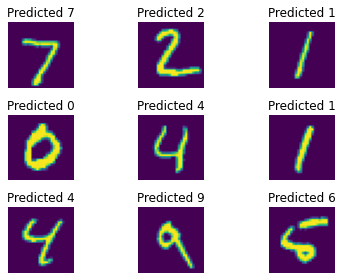

In [10]:
predictions = model.predict(x_test[0:10])
for i in range(9):
  plt.subplot(3,3,i+1)
  prediction = predictions[i]
  predicted_class = np.argmax(prediction)
  plt.title('Predicted {}'.format(predicted_class, y_test[i]))
  plt.axis('off')
  plt.imshow(x_test[i])

# To align images without titles overlapping
plt.tight_layout()

Seems like we did quite well! Now rather than having to manually inspect all the data, let's use the evaluate() function which uses the optimizer and metrics we established earlier to help us determine our performance.

In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1015 - accuracy: 0.9686


You'll see we achieved an accuracy of 97%! Quite nice if you ask me.

# Conclusion

Creating and testing this model was relatively simple - it took us about 40 lines of code. Imagine that we were given this exact same task but had to do it without a neurlal network. We would be manually coding up all of the rules that were learned automatically. Imagine how much time it would take to go over all of the edge cases and getting a computer to distinguish between someone's poorly written 5 and another person's 6. Having to code up all these rules would be very time consuming and very tedious. But with neural networks, it's so much simpler. We give it the data, and it figures out the solution.